<a href="https://colab.research.google.com/github/JosuePerezValenzuela/Identificacion-de-mascotas/blob/master/IA2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

#Para la meta data
metaDataCamino = "/content/metaData.csv"
metaData = pd.read_csv(metaDataCamino)

#Arreglos para el manejo tanto de las imagenes y metadata
imagenes = []
metadatos = []

#Accederemos a la informacion de la metada para asegurarnos que se cargo correctamente
metaData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  27 non-null     object
dtypes: object(1)
memory usage: 344.0+ bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Dado que subimos un .zip con imagenes de nuestras mascotas, descomprimiremos dicho .zip
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/Ades/
  inflating: dataset/Ades/mascota11a.png  
  inflating: dataset/Ades/mascota11b.png  
   creating: dataset/Belinda/
  inflating: dataset/Belinda/Belinda1.jpg  
  inflating: dataset/Belinda/Belinda2.jpg  
   creating: dataset/Bicho/
  inflating: dataset/Bicho/Bicho1.jpg  
  inflating: dataset/Bicho/Bicho2.jpg  
   creating: dataset/Carlitos/
  inflating: dataset/Carlitos/mascota24a.png  
  inflating: dataset/Carlitos/mascota24b.png  
   creating: dataset/Chava/
  inflating: dataset/Chava/Chava1.jpg  
  inflating: dataset/Chava/Chava2.jpg  
  inflating: dataset/Chava/mascota10c.png  
  inflating: dataset/Chava/mascota10dchava.png  
   creating: dataset/Chica/
  inflating: dataset/Chica/mascota6achica.PNG  
  inflating: dataset/Chica/mascota6b.PNG  
   creating: dataset/Dexter/
  inflating: dataset/Dexter/mascota8a.png  
  inflating: dataset/Dexter/mascota8b.png  
   creating: dataset/Dukesa/
  inflating: dataset/Dukesa/mascota13a.png  
   

In [ ]:
!unzip encontrados.zip

Archive:  encontrados.zip
  inflating: encontrados/encontrado2.png  
  inflating: encontrados/mascota3.png  
  inflating: encontrados/persaNaranja.jpg  


In [ ]:
!unzip caras.zip

Archive:  caras.zip
   creating: caras/Ades/
  inflating: caras/Ades/mascota11b.png  
   creating: caras/Belinda/
  inflating: caras/Belinda/Belinda2.jpg  
   creating: caras/Bicho/
  inflating: caras/Bicho/Bicho1.jpg  
   creating: caras/Carlitos/
  inflating: caras/Carlitos/mascota24b.png  
   creating: caras/Chava/
  inflating: caras/Chava/Chava1.jpg  
   creating: caras/Chica/
  inflating: caras/Chica/mascota6b.PNG  
   creating: caras/Dexter/
  inflating: caras/Dexter/mascota8a.png  
   creating: caras/Dukesa/
  inflating: caras/Dukesa/mascota13a.png  
   creating: caras/Electrodo/
  inflating: caras/Electrodo/electrodo2.jpg  
   creating: caras/Esperanza/
  inflating: caras/Esperanza/mascota1e.png  
   creating: caras/Frodo/
 extracting: caras/Frodo/mascota16a.png  
   creating: caras/GatoAtigrado/
  inflating: caras/GatoAtigrado/mascota7a.png  
   creating: caras/Golden/
  inflating: caras/Golden/mascota20e.png  
   creating: caras/Husky/
  inflating: caras/Husky/huskyb.jpg  
  

In [ ]:
!unzip anchor
!unzip anchor2
!unzip pruebas
!unzip pruebas2

Archive:  anchor.zip
   creating: anchor/entrada/
  inflating: anchor/entrada/encontrado2.png  
Archive:  anchor2.zip
   creating: anchor2/entrada/
  inflating: anchor2/entrada/gatoPersa.jpg  
Archive:  pruebas.zip
   creating: pruebas/Dukesa/
  inflating: pruebas/Dukesa/mascota13a.png  
   creating: pruebas/Jager/
  inflating: pruebas/Jager/mascota4a.png  
   creating: pruebas/Luna/
  inflating: pruebas/Luna/mascota22a.png  
Archive:  pruebas2.zip
   creating: pruebas2/Otto/
  inflating: pruebas2/Otto/mascota14a.png  
   creating: pruebas2/Porrotito/
  inflating: pruebas2/Porrotito/mascota12a.png  
   creating: pruebas2/Toti/
  inflating: pruebas2/Toti/Toti1.jpg  


In [ ]:
%cd /content
!rm -r pruebas

/content


In [ ]:
!unzip pruebas

Archive:  pruebas.zip
   creating: pruebas/Dukesa/
  inflating: pruebas/Dukesa/mascota13a.png  
   creating: pruebas/Luna/
  inflating: pruebas/Luna/mascota22a.png  
   creating: pruebas/Piki/
  inflating: pruebas/Piki/mascota23a.png  


Found 61 images belonging to 27 classes.
Found 2 images belonging to 27 classes.


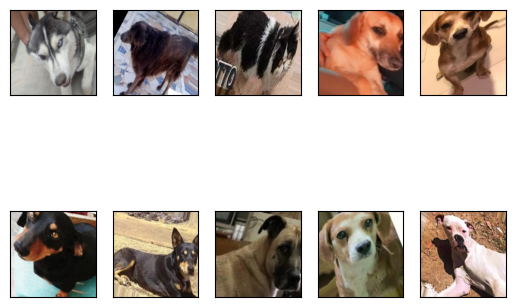

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#Para el aumento de datos
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    shear_range = 15,
    zoom_range = [0.7, 1.2],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=16, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=16, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
#Modelos pre entrenados
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/google/mobilenet-v3/frameworks/TensorFlow2/variations/large-100-224-feature-vector/versions/1"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

#No permitir el entrenamiento del modelo
mobilenetv2.trainable = False

In [ ]:
#Aquitectura del modelo
modeloImagenes = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(27, activation="softmax")
])

#Resumen del modelo
modeloImagenes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 27)                34587     
                                                                 
Total params: 4261019 (16.25 MB)
Trainable params: 34587 (135.11 KB)
Non-trainable params: 4226432 (16.12 MB)
_________________________________________________________________


In [ ]:
#Compilacion del modelo
modeloImagenes.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenamiento del modelo
epocas = 15

historial = modeloImagenes.fit(
    data_gen_entrenamiento, epochs=epocas, batch_size=32, validation_data=data_gen_pruebas
)

Epoch 1/15
4/4 [==============================] - 14s 572ms/step - loss: 3.4024 - accuracy: 0.0820 - val_loss: 1.9903 - val_accuracy: 1.0000
Epoch 2/15
4/4 [==============================] - 1s 243ms/step - loss: 2.5821 - accuracy: 0.2787 - val_loss: 1.8423 - val_accuracy: 1.0000
Epoch 3/15
4/4 [==============================] - 1s 227ms/step - loss: 1.9516 - accuracy: 0.5738 - val_loss: 1.3102 - val_accuracy: 1.0000
Epoch 4/15
4/4 [==============================] - 1s 247ms/step - loss: 1.3645 - accuracy: 0.9016 - val_loss: 1.0538 - val_accuracy: 1.0000
Epoch 5/15
4/4 [==============================] - 1s 245ms/step - loss: 1.0314 - accuracy: 0.8852 - val_loss: 0.9918 - val_accuracy: 1.0000
Epoch 6/15
4/4 [==============================] - 2s 420ms/step - loss: 0.6849 - accuracy: 0.9836 - val_loss: 0.7862 - val_accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 1s 254ms/step - loss: 0.5075 - accuracy: 0.9672 - val_loss: 0.9667 - val_accuracy: 1.0000
Epoch 8/15
4/4 [===

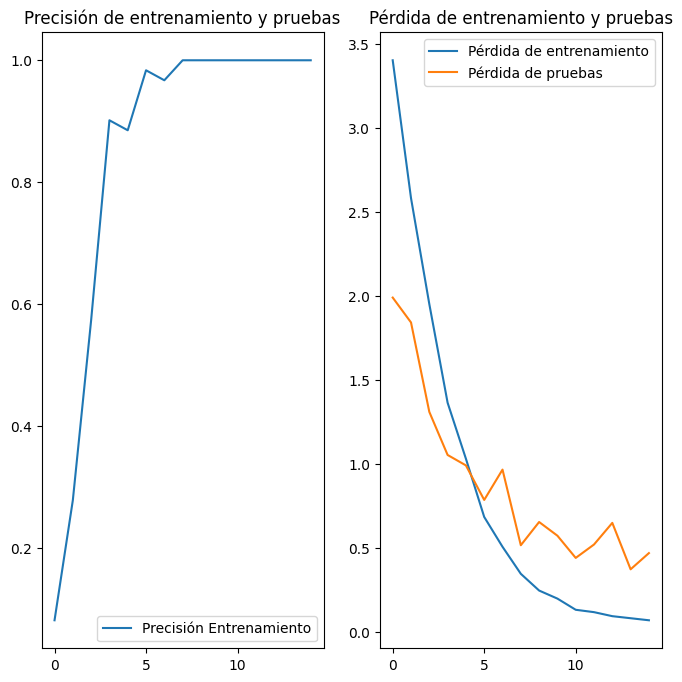

In [ ]:
#Graficas para que se vea fachero al presentacion
acc = historial.history['accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(epocas)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen
from PIL import Image
import requests
from io import BytesIO
import cv2

nombre_clases = metaData.iloc[:, 0]

def obtener_clases_potenciales(predicciones):
  indices_ordenados = np.argsort(predicciones)[-5:][::-1]

  return indices_ordenados

def nombre_mascota_porIndice(indices):
  nombres = []
  for i in range(len(indices)):
    nombres.append(nombre_clases[indices[i]])
  return nombres

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  #Predecimos usando la red y la imagen proporcionada
  prediccion = modeloImagenes.predict(img.reshape(-1, 224, 224, 3))
  #Obtenemos en un arreglo todas las predicciones
  global predicciones
  predicciones = prediccion[0]
  #Obtenemos el mejor
  clase = predicciones.argmax()
  return nombre_clases[clase]

#Categorizar una imagen en una ruta
def categorizar_con_ruta(ruta):
  img = Image.open(ruta)
  img = np.array(img).astype(float) / 255
  img = cv2.resize(img, (224, 224))
  if img.shape[2] == 4:
    img = img[:, :, :3]
  plt.imshow(img)
  plt.show()
  aux = modeloImagenes.predict(img.reshape(-1, 224, 224, 3))
  global predicciones
  predicciones = aux[0]
  global candidatos
  candidatos = obtener_clases_potenciales(predicciones)
  global nombres_candidatos
  nombres_candidatos = nombre_mascota_porIndice(candidatos)
  clase = predicciones.argmax()
  return [nombre_clases[clase], predicciones, candidatos, nombres_candidatos]

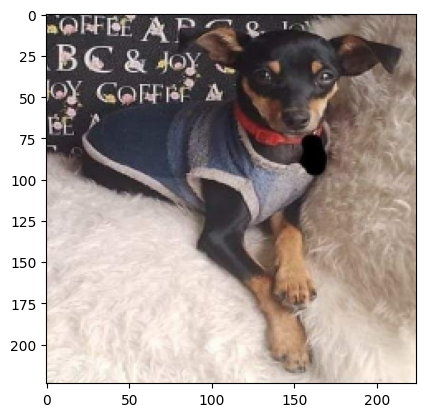

1/1 [==============================] - 0s 67ms/step
Prediccion basica por la red:  Dukesa
Lista de las puntuaciones:  [0.00139788 0.00263691 0.01692818 0.01801664 0.05171878 0.00553594
 0.00515478 0.28169608 0.0035945  0.05883949 0.04820188 0.00528914
 0.00091545 0.0011387  0.00226925 0.03785296 0.00057836 0.02644291
 0.0076251  0.2514782  0.03033569 0.03704525 0.02715563 0.06072722
 0.00138351 0.01050938 0.00553224]
Candidatos posibles:  [ 7 19 23  9  4]
Nombres de las mascotas candidatas:  ['Dukesa', 'Luna', 'Piki', 'Esperanza', 'Chava']


In [ ]:
prediccion = categorizar_con_ruta("/content/encontrados/encontrado2.png")
print("Prediccion basica por la red: ", prediccion[0])

print("Lista de las puntuaciones: ", prediccion[1])

print("Candidatos posibles: ", prediccion[2])

print("Nombres de las mascotas candidatas: ", prediccion[3])

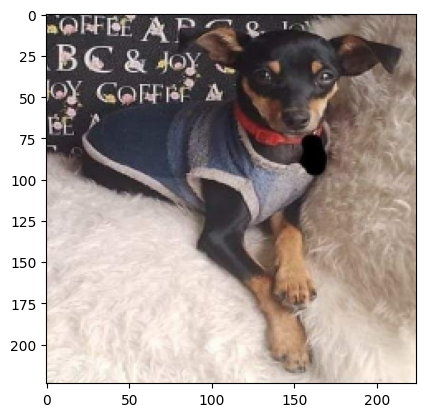

1/1 [==============================] - 0s 36ms/step
encontrado2.png es Dukesa


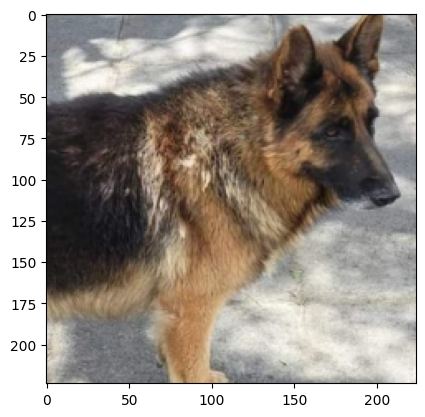

1/1 [==============================] - 0s 53ms/step
mascota3.png es Samantha


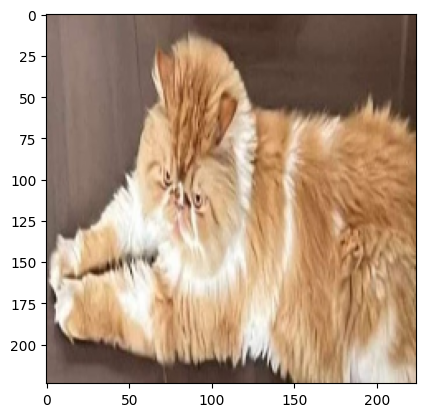

1/1 [==============================] - 0s 32ms/step
persaNaranja.jpg es Toti


In [ ]:
directorio = "/content/encontrados"

lista_imgs_probar = os.listdir(directorio)
for nombre_imagen in lista_imgs_probar:
  ruta_imagen = os.path.join(directorio, nombre_imagen)
  aux = categorizar_con_ruta(ruta_imagen)[0]
  print(nombre_imagen, "es", aux)

In [ ]:
#Red siamesa
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
print(torch.cuda.is_available())

True


In [ ]:
# Funciones que se usaran
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [ ]:
#Clase de la red siamesa
class SiameseNetworkDataset(Dataset):
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        #Al menos la mitad debe ser de la misma clase
        should_get_same_class = random.randint(0,1)
        if should_get_same_class:
            while True:
                #Buscar hasta encontrar uno de la misma clase
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:

            while True:
                #Buscar hasta encontrar uno de distinta clase
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)

In [ ]:
# Carga del data set de caras
folder_dataset = datasets.ImageFolder(root="/content/caras")

#Redimension del tamaño de las imagenes
transformation = transforms.Compose([transforms.Resize((100,100)),
                                     transforms.ToTensor()
                                    ])

#Inicializar la red
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)

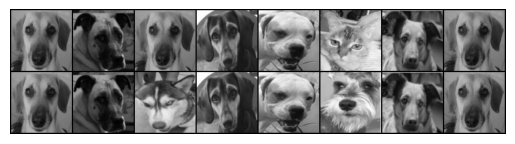

[0. 0. 1. 0. 0. 1. 0. 0.]


In [ ]:
#Prueba a priori
#Usando nuestro conjunto de datos
vis_dataloader = DataLoader(siamese_dataset,
                            shuffle=True,
                            num_workers=2,
                            batch_size=8)

# Obtener una imagen
example_batch = next(iter(vis_dataloader))

#Se mostrara una grilla 2x8 con una lista, si el indice de la lista es 0 indica que las
#imagenes son "parecidas", si se acerca a 1 son "distintas"
concatenated = torch.cat((example_batch[0], example_batch[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

In [ ]:
#Creacion de la arquitectura de la red siamesa
class SiameseNetwork(nn.Module):

    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Capas convolucionales
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11,stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3,stride=1),
            nn.ReLU(inplace=True)
        )

        # Capas a ser utilizadas despues de las convoluciones
        self.fc1 = nn.Sequential(
            nn.Linear(384, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256,2)
        )

    def forward_once(self, x):
        # funcion para pasar una imagen por nuestras capas
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # Funcion para pasar 2 iamgenes y cada una sea mandada a la red
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)

        return output1, output2

In [ ]:
#Nuestra funcion de perdida
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate de la distancia euclidiana
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive

In [ ]:
#Carga del conjunto de datos de entrenamiento
train_dataloader = DataLoader(siamese_dataset,
                              shuffle=True,
                              num_workers=8,
                              batch_size=64)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#Inicializa la red
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0005 )

Epoch number 0
 Current loss 2.0701754093170166

Epoch number 1
 Current loss 1.9012219905853271

Epoch number 2
 Current loss 1.8397386074066162

Epoch number 3
 Current loss 2.4186248779296875

Epoch number 4
 Current loss 2.1202590465545654

Epoch number 5
 Current loss 0.9105360507965088

Epoch number 6
 Current loss 0.6749351620674133

Epoch number 7
 Current loss 0.16014127433300018

Epoch number 8
 Current loss 0.1938427835702896

Epoch number 9
 Current loss 0.09876732528209686

Epoch number 10
 Current loss 0.01989174261689186

Epoch number 11
 Current loss 5.925925982558367e-13

Epoch number 12
 Current loss 7.407407478197958e-13

Epoch number 13
 Current loss 8.88888897383755e-13

Epoch number 14
 Current loss 1.2592592983987072e-12

Epoch number 15
 Current loss 9.629629992707889e-13

Epoch number 16
 Current loss 1.1111110946246394e-12

Epoch number 17
 Current loss 1.1851851965116733e-12

Epoch number 18
 Current loss 1.333333400285741e-12

Epoch number 19
 Current loss 8

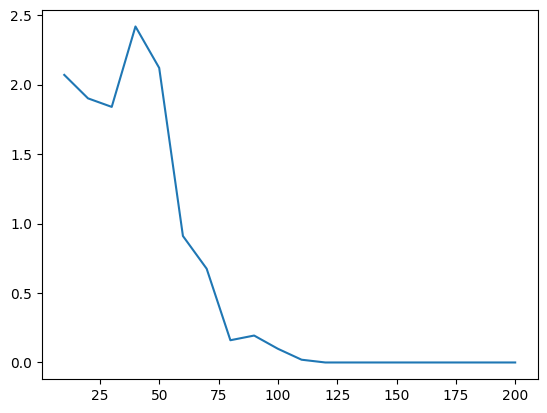

In [ ]:
#Entrenamiento de la red
counter = []
loss_history = []
iteration_number= 0

# Ciclo con las epocas a entrenar
for epoch in range(20):

    # Iterar entre los bloques
    for i, (img0, img1, label) in enumerate(train_dataloader, 0):

        # Mandar las imagenes y etiquetas a cuda
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        # Reinicio de la gradiente a 0
        optimizer.zero_grad()

        # Pasar 2 imagenes a nuestra red
        output1, output2 = net(img0, img1)

        # Pasar los resultados de la red y la etiqueta a la funcion de perdida
        loss_contrastive = criterion(output1, output2, label)

        # Calculo para el backpropagation
        loss_contrastive.backward()

        # Optimizar
        optimizer.step()

        # Para imprimir los errores
        if i % 10 == 0 :
            print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")
            iteration_number += 10

            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

show_plot(counter, loss_history)

In [ ]:
!unzip encontrados.zip

Archive:  encontrados.zip
  inflating: encontrados/encontrado2.png  
  inflating: encontrados/mascota3.png  
  inflating: encontrados/persaNaranja.jpg  


In [ ]:
%cd /content
!unzip pruebas2.zip

/content
Archive:  pruebas2.zip
   creating: pruebas2/Otto/
  inflating: pruebas2/Otto/mascota14a.png  
   creating: pruebas2/Porrotito/
  inflating: pruebas2/Porrotito/mascota12a.png  
   creating: pruebas2/Toti/
  inflating: pruebas2/Toti/Toti1.jpg  


In [ ]:
%cd /content
!rm -r encontrados

/content


In [ ]:
folder_img_anchor = datasets.ImageFolder(root="/content/anchor")
anchor_transform = SiameseNetworkDataset(imageFolderDataset=folder_img_anchor,
                                        transform=transformation)
anchor_dataloader = DataLoader(anchor_transform, num_workers=1,batch_size=1)

anchor_iter = iter(anchor_dataloader)
print(anchor_dataloader)
print(anchor_iter)
print(len(anchor_iter))
anchor_image, _, _ = next(anchor_iter)

1


In [ ]:
folder_img_anchor2 = datasets.ImageFolder(root="/content/anchor2")
anchor_transform2 = SiameseNetworkDataset(imageFolderDataset=folder_img_anchor2,
                                        transform=transformation)
anchor_dataloader2 = DataLoader(anchor_transform2, num_workers=1,batch_size=1)

anchor_iter2 = iter(anchor_dataloader2)
print(anchor_dataloader2)
print(anchor_iter2)
print(len(anchor_iter2))
anchor_image2, _, _ = next(anchor_iter2)

1


In [ ]:
# Carga de datos a probar, tranformado las imagenes
folder_dataset_test = datasets.ImageFolder(root="/content/pruebas2")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, num_workers=0, batch_size=1)


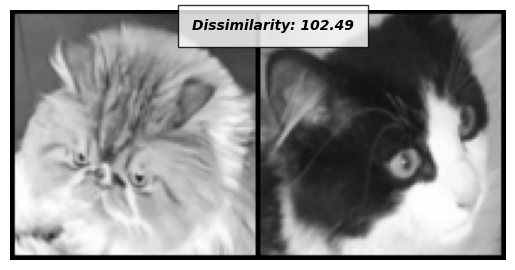

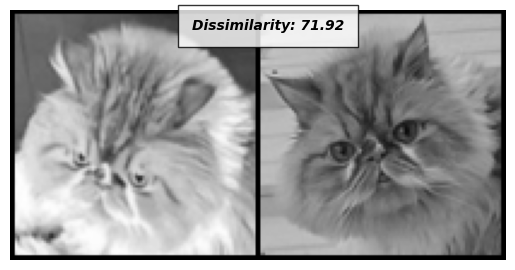

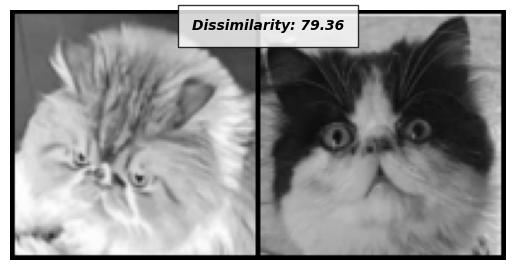

In [ ]:
while True:
    try:
        dataiter = iter(test_dataloader)
        imgs = []

        # Ciclo para comparar mi imagen inicial con las 3 clases
        for i in range(3):
            class_image, _, _ = next(dataiter)

            # Verificar si la imagen ya está en la lista
            while any(torch.equal(class_image, img) for img in imgs):
                class_image, _, _ = next(dataiter)

            # Agregar la imagen a la lista
            imgs.append(class_image)

        break

    except StopIteration:
        imgs.clear()
        continue

for aux in imgs:

  concatenated = torch.cat((anchor_image2, aux), 0)          #Aqui

  output1, output2 = net(anchor_image2.cuda(), aux.cuda())  #Aqui
  euclidean_distance = F.pairwise_distance(output1, output2)
  imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')